In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random

# Creating Taxonomies over Applications

In [2]:
with open("nl_taxonomy.json") as f:
    data = json.load(f)

CHARS = "ABCD"
def print_taxonomy(taxonomy):
    cluster_idx = 0
    for key, value in taxonomy.items():
        print()
        print("===============")
        print(cluster_idx, key)
        subclsuter_idx = 0
        for sub_key in value:
            print("\t", f"{cluster_idx}.{CHARS[subclsuter_idx]}", sub_key)
            subclsuter_idx += 1
        cluster_idx += 1

print_taxonomy(data["nl_taxonomy"])
predicate2matching_samples = data["nl_rep2matching_samples"] # a mapping from each predicate to all samples that match it


0 the user wants to request a descriptive screenplay writing; specifically, the query asks for the generation of screenplays including dialogues and detailed background. For example, 'Write a very long, coherent, elaborate, descriptive and detailed screenplay...'
	 0.A the user wants to request narrative writing from a personal or first-person perspective; specifically, the query asks for detailed descriptions and thoughts from the viewpoint of a character. For example, 'Write a long, detailed, original, imaginative and interesting scene narrated by Celestine from the first person perspective.'
	 0.B the user wants to request role-playing; specifically, the query involves engaging in a narrative role-playing scenario with predefined characters. For example, 'We’ll role play as characters from the walking dead game season 4, you’ll provide answers for Clementine and I’ll take the role of Luis...'
	 0.C the user wants to request dialogue writing; specifically, the query focuses on gener

# Characterizing Temporal Trends in Applications

In [3]:
with open("timeseries_application_result.json", 'r') as f:
    result = json.load(f)

texts_by_time = result["texts_by_time"] # the texts in the order of time
predicate2text2matching = result["predicate2text2matching"] # for each learned predicate, whether a text mathces it or not (1/0)

In [4]:
# smoothes the frequency (across time) of the texts that match the predicate
def continuous_arr(arr):
    init = np.mean(arr[:100])
    cur = init
    continuous = [cur]
    for i in range(1, len(arr)):
        cur = 0.995 * cur + 0.005 * arr[i]
        continuous.append(cur)
    return continuous

the user wants to request information or translation in a different language; specifically, the query involves requesting content in another language or translating text. For example, '改写 将传统无人机模型进行软硬件组装调试...' or 'سلام'


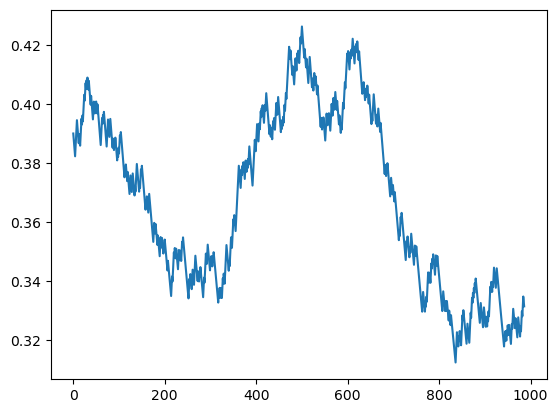

the user wants to engage in academic or scholarly discussion; specifically, the query involves seeking information or topics related to academic subjects or discussions. For example, '大学生为什么要深入理解中国特色社会主义'.


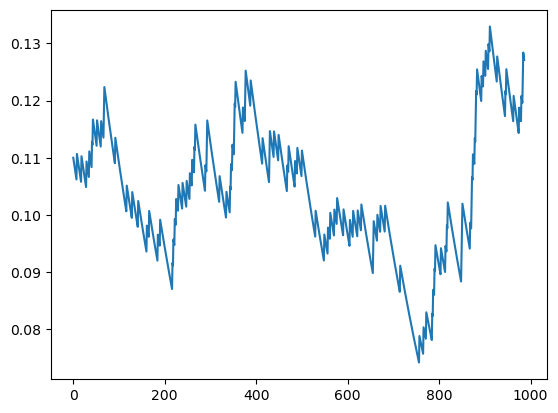

the user wants to request writing or content creation in a specific style or genre; specifically, the query involves asking for creating stories or other written content based on given prompts. For example, 'Make a detailed comedic story of a college jock sitting in a pond in the nude. He farts, killing fish with the horrible stench, which he happily devours.'.


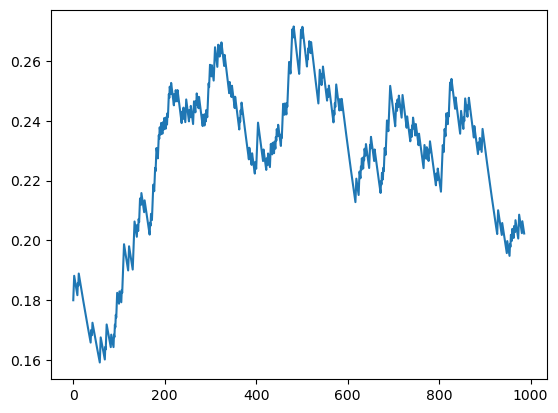

the user wants to request general information or answers to factual questions; specifically, the query involves seeking answers to broad or factual questions. For example, 'Who are you?'.


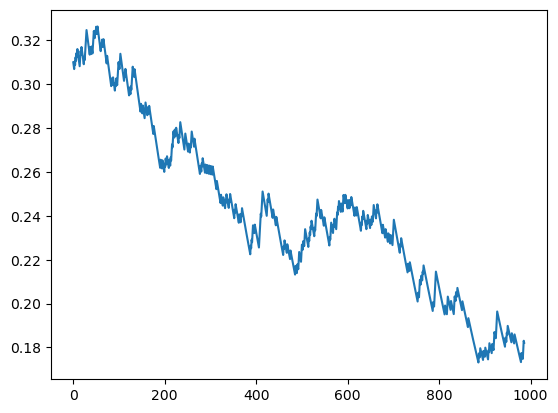

In [5]:
predicate2ordered_matching = {
    predicate: [predicate2text2matching[predicate][t] for t in texts_by_time]
    for predicate in predicate2text2matching
}
for predicate, arr in predicate2ordered_matching.items():
    print(predicate)
    continuous_matching = continuous_arr(arr)
    plt.plot(continuous_matching, label=predicate)
    plt.show()

<a list of 4 Text objects>


/tmp/ipykernel_4139749/3936976667.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


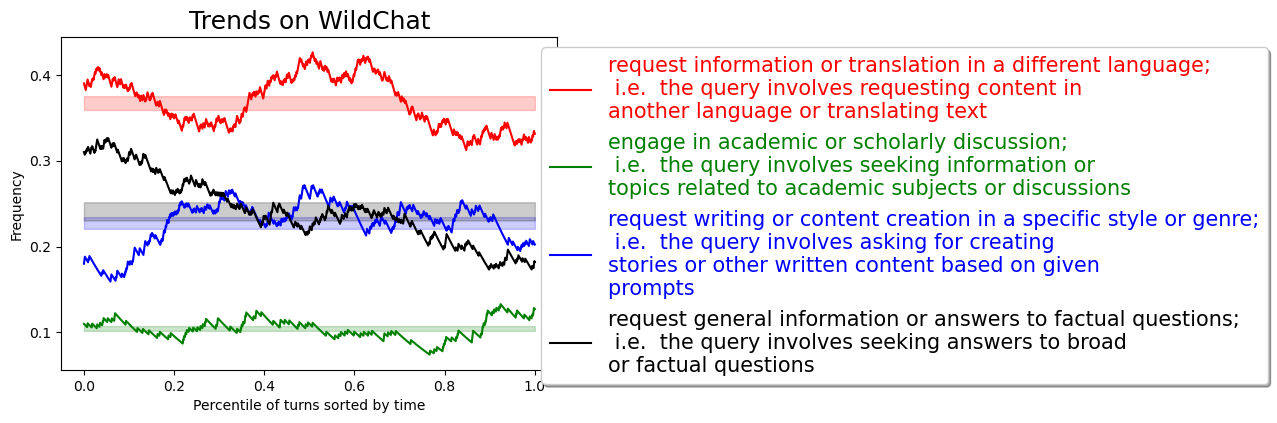

In [6]:
add_sig = True
colors = "rgbk"

plt.rcParams['text.usetex'] = True
fig = plt.figure()
ax = plt.subplot(111)

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis

def wrap(x):
    toks = x.split(" ")

    # at most 50 words per line
    lines = []
    cur_line = ""
    for tok in toks:
        if len(cur_line) + len(tok) > 50:
            lines.append(cur_line)
            cur_line = ""
        cur_line += tok + " "
    lines.append(cur_line)
    return "\n".join(lines)

for i, predicate in enumerate(predicate2ordered_matching):
    arr = predicate2ordered_matching[predicate]


    predicate_abbr = predicate.split(". For example")[0].replace("the user wants to", "").strip()
    before_colon = predicate_abbr.split(";")[0]
    after_colon = predicate_abbr.split(";")[1].replace("specifically,", "i.e. ")
    predicate_abbr = before_colon + ";\n" + wrap(after_colon)


    xrange = np.linspace(0, 1, len(arr))
    arr = continuous_arr(arr)
    ax.plot(xrange, arr, color=colors[i], label=f"$\phi_{i}$: " + predicate_abbr)

    if add_sig:
        lower_bound, upper_bound = 1, 0

        for j in range(100):
            shuffled_arr = arr.copy()
            random.shuffle(shuffled_arr)
            shuffled_arr = continuous_arr(shuffled_arr)
            l, u = min(shuffled_arr), max(shuffled_arr)
            lower_bound = min(lower_bound, l)
            upper_bound = max(upper_bound, u)
        
        plt.fill_between(xrange, lower_bound, upper_bound, alpha=0.2, color=colors[i])
    plt.rcParams.update({'font.size': 15})


plt.title("Trends on WildChat")
plt.xlabel("Percentile of turns sorted by time")
plt.ylabel("Frequency")


legend = ax.legend(loc='upper center', bbox_to_anchor=(1.7, 1),
          fancybox=True, shadow=True)

legend_texts = legend.get_texts()
print(legend_texts)
for i in range(len(legend_texts)):
    legend_texts[i].set_color(colors[i])
# save the entire figure
plt.tight_layout()
plt.show()